# Python program to convert a 2D histogram into a pandas DataFrame

## Initialization

In [269]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [272]:
import re
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm

## Read ROOT  data

In [188]:
TH2D_name='ObsXS_2D'
df=pd.DataFrame()
f=open('data.txt')
for l in f.readlines():
    if re.search('^\s+TH2D\s\*'+TH2D_name,l):
        ll=re.sub('\);$','',l).split(',')
        if len(ll)==8:
            lll=ll[2:]
            ps=pd.Series({'xpoints':lll[0],'xmin':lll[1],'xmax':lll[2],
                          'ypoints':lll[3],'ymin':lll[4],'ymax':lll[5]})        
        
        
    bl=r'^\s+'+TH2D_name+'__1->SetBinContent\('
    if re.search(bl,l):
        iz=re.sub(bl+'(.*)\);\n',r'\1',l).split(',')
        if len(iz)==2:
            df=df.append({'i':eval(iz[0]),'cs':eval(iz[1])},ignore_index=True)
            
df['i']=df.i.astype('int')
ps=ps.astype('int')

## Prepare Grid-Data

In [258]:
xy=pd.DataFrame()
ii=0
for x in np.linspace(ps.xmin,ps.xmax,ps.xpoints):
    jj=0
    for y in np.linspace(ps.ymin,ps.ymax,ps.ypoints):
        xy=xy.append({'ij':(ii,jj),'x':x,'y':y},ignore_index=True)
        jj=jj+1 
    ii=ii+1

## Convert to DataFrame

In [275]:
th2d=pd.DataFrame()
kold=dfi.i.values[0]+1
jl=list(reversed(range(ps.ypoints)))
il=list(reversed(range(ps.xpoints)))
i=0;j=0
change_j=False

for k in dfi.i:
    if kold-k==1:
        kold=k
        th2d=th2d.append({'nbin':k,'xbin':il[i],'ybin':jl[j],'x':xy[xy.ij==(il[i],jl[j])].x.values[0],
                          'y':xy[xy.ij==(il[i],jl[j])].y.values[0],
                          'cs':dfi[dfi.i==k].cs.values[0]},ignore_index=True)
        i=i+1

    else:
        change_j=True
            #if k<13000:
    if change_j:
        print('l',k,j,end='\r')
        change_j=False
        #change line
        i=0
        kold=k 
        j=j+1
        th2d=th2d.append({'nbin':k,'xbin':il[i],'ybin':jl[j],'x':xy[xy.ij==(il[i],jl[j])].x.values[0],
                'y':xy[xy.ij==(il[i],jl[j])].y.values[0],
                 'cs':dfi[dfi.i==k].cs.values[0]},ignore_index=True)
        #print(k,il[i],jl[j],xy[xy.ij==(il[i],jl[j])].x.values[0],xy[xy.ij==(il[i],jl[j])].y.values[0],
        #         dfi[dfi.i==k].cs.values[0])
        #update line
        i=i+1
        #break
        #if k<13000:
        #    break
    

In [278]:
for key in ['nbin','xbin','ybin']:
    th2d[key]=th2d[key].astype(int)

In [284]:
th2d=th2d.sort_values('nbin').reset_index(drop=True)

check bins

In [287]:
th2d[np.logical_and(th2d.xbin==16,th2d.ybin==18)]

,cs,nbin,x,xbin,y,ybin
2176,0.102007,2335,501.680672,16,227.027027,18


## Save

In [288]:
th2d.to_excel('TH2D.xlsx',index=False)

## Restore

In [295]:
th2d=pd.read_excel('TH2D.xlsx')

## Check plot

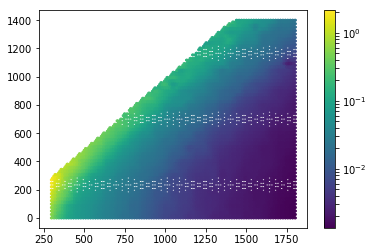

In [297]:
from matplotlib.colors import LogNorm
plt.hexbin(th2d.x,th2d.y,th2d.cs,norm=LogNorm())
plt.colorbar()